<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-0">Business Understanding</a></span></li><li><span><a href="#Data-Meaning-Type" data-toc-modified-id="Data-Meaning-Type-1">Data Meaning Type</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1">Load Data</a></span><ul class="toc-item"><li><span><a href="#Beneficiary-data-Fields" data-toc-modified-id="Beneficiary-data-Fields-1.1.1">Beneficiary data Fields</a></span></li><li><span><a href="#Inpatient-Data-fields" data-toc-modified-id="Inpatient-Data-fields-1.1.2">Inpatient Data fields</a></span></li><li><span><a href="#Providers-with-labels" data-toc-modified-id="Providers-with-labels-1.1.3">Providers with labels</a></span></li></ul></li></ul></li><li><span><a href="#Data-Quality" data-toc-modified-id="Data-Quality-2">Data Quality</a></span><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2.1">Missing Values</a></span><ul class="toc-item"><li><span><a href="#Inpatient" data-toc-modified-id="Inpatient-2.1.1">Inpatient</a></span></li><li><span><a href="#Beneficiary" data-toc-modified-id="Beneficiary-2.1.2">Beneficiary</a></span></li></ul></li></ul></li><li><span><a href="#Data-type-conversions" data-toc-modified-id="Data-type-conversions-3">Data type conversions</a></span><ul class="toc-item"><li><span><a href="#Final-dataset" data-toc-modified-id="Final-dataset-3.1">Final dataset</a></span></li></ul></li></ul></div>

# Business Understanding

Our selected dataset is a labeled collection of inpatient medical claims, non-personally identifiable beneficiary data, and a list of providers who have been suspected as filing fraudulent claims. Detecting fraudulent claims is a request frequently asked by a great many organizations in the healthcare industry (and especially in insurance), and claim data is readily available at many of these organizations, so it stands to reason that we may be able to predict fraudulent behavior by analyzing a large number of medical claims. We will analyze over 40,000 medical claims, non-personally identifying beneficiary information and provider IDs who have previously been identified as engaging in suspected fraudulent behavior in order to attempt to predict possible fraudulent behavior in new claims.

Because we have a categorical response variable, we'll need to treat this as a classification problem. We will predict possible fraudulent claims and measure effectiveness using cross validation and focus on attaining high metrics in precision and recall. Precision measures the percentage of fraudulent predictions which are truly fraudulent, and recall measures the total percentage of fraudulent claims correctly identified. These two metrics have been identified as most appropriate, due to our objective of correctly identifying fraudulent claims.
Some potential outcomes of using this dataset are potentially improving viability of existing provider fraud detection mechanisms in insurance and member paid claims. Knowledge of fraudulent or excessive billed services awareness for what is or is not acceptable can save money and help reduce rising healthcare costs due to rising insurance premiums.

# Data Meaning Type

This section provides more information on fields and field types.

## Load Data

Load data from following files.

<table align="left">
  <thead>
    <tr>
      <th>#</th>
      <th>File Name </th>
      <th>Description</th>
      <th>Number of records</th>
    </tr>
  </thead>
   <tr>
      <th scope="row">1</th>
          <td> <a href="https://github.com/sachinac/ML7331/blob/master/data/Train_Beneficiarydata-1542865627584.csv"> Train_Beneficiarydata-1542865627584.csv </a> </td>
          <td> Beneficiary Information </a></td>
      <td>138,556</td>
    </tr>
   <tr>
      <th scope="row">2</th>
          <td><a href="https://github.com/sachinac/ML7331/blob/master/data/Train_Inpatientdata-1542865627584.csv"> Train_Inpatientdata-1542865627584.csv </a> </td>
          <td> Inpatient Claims </a></td>
      <td>40,474</td>
    </tr>
   <tr>
      <th scope="row">3</th>
          <td><a href="https://github.com/sachinac/ML7331/blob/master/data/Train-1542865627584.csv"> Train-1542865627584.csv </a> </td>
          <td> Labels </a></td>
      <td>5,410</td>
    </tr>


</table>



In [1]:
import pandas as pd
import missingno as msno
import re as reg_expression

beneficiary_ds   = pd.read_csv("data/Train_Beneficiarydata-1542865627584.csv")
inpatient_ds     = pd.read_csv("data/Train_Inpatientdata-1542865627584.csv")
outpatient_ds    = pd.read_csv("data/Train_Outpatientdata-1542865627584.csv")
target_ds        = pd.read_csv("data/Train-1542865627584.csv")

ben_dtypes       = pd.read_csv("data/ben_dypes.csv")
inpatient_dtypes = pd.read_csv("data/inpatient_dtypes.csv")
target_dtypes    = pd.read_csv("data/target_dtypes.csv")

### Beneficiary data Fields

In [2]:
ben_dtypes.style.set_properties(**{'text-align': 'left'})

### Inpatient Data fields

In [3]:
inpatient_dtypes.style.set_properties(**{'text-align': 'left'})

### Providers with labels

In [4]:
target_dtypes.style.set_properties(**{'text-align': 'left'})

# Data Quality

## Missing Values

### Inpatient 

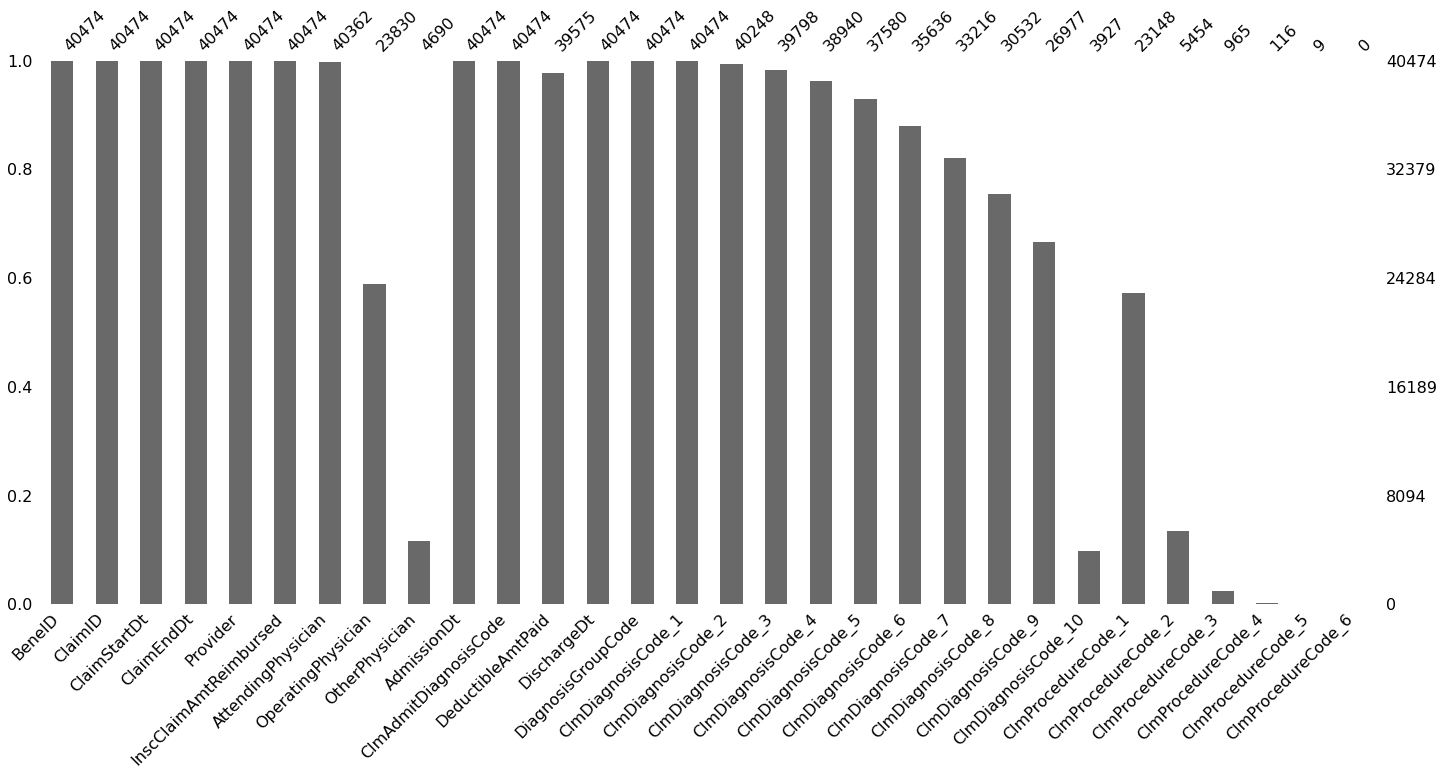

In [5]:
msno.bar(inpatient_ds)

In [6]:
missing_vcols = ['OperatingPhysician', 'OtherPhysician','ClmAdmitDiagnosisCode','DiagnosisGroupCode', 
                 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
                 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 
                 'ClmDiagnosisCode_10','ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 
                 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'] 

inpatient_ds[missing_vcols] = inpatient_ds[missing_vcols].fillna('None')


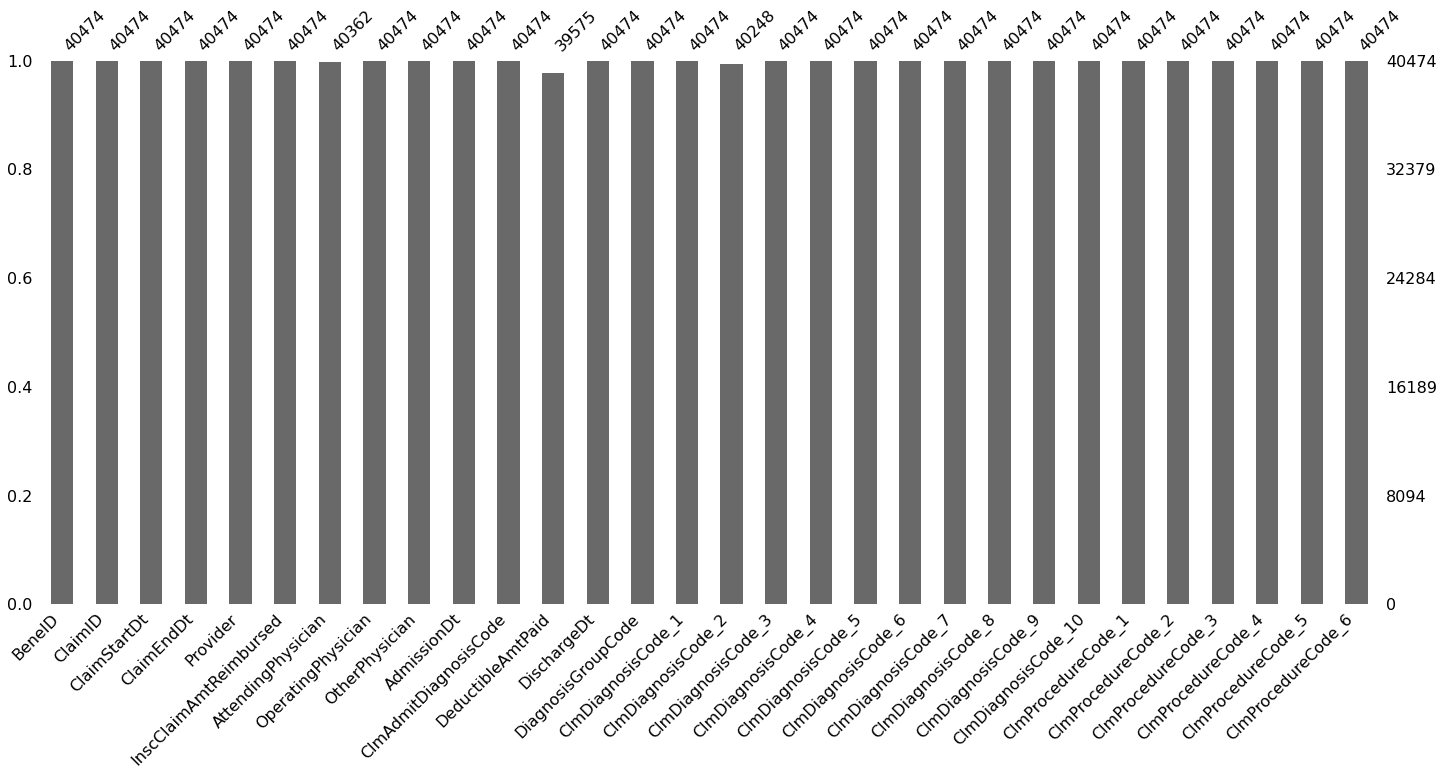

In [7]:
msno.bar(inpatient_ds)

### Beneficiary 

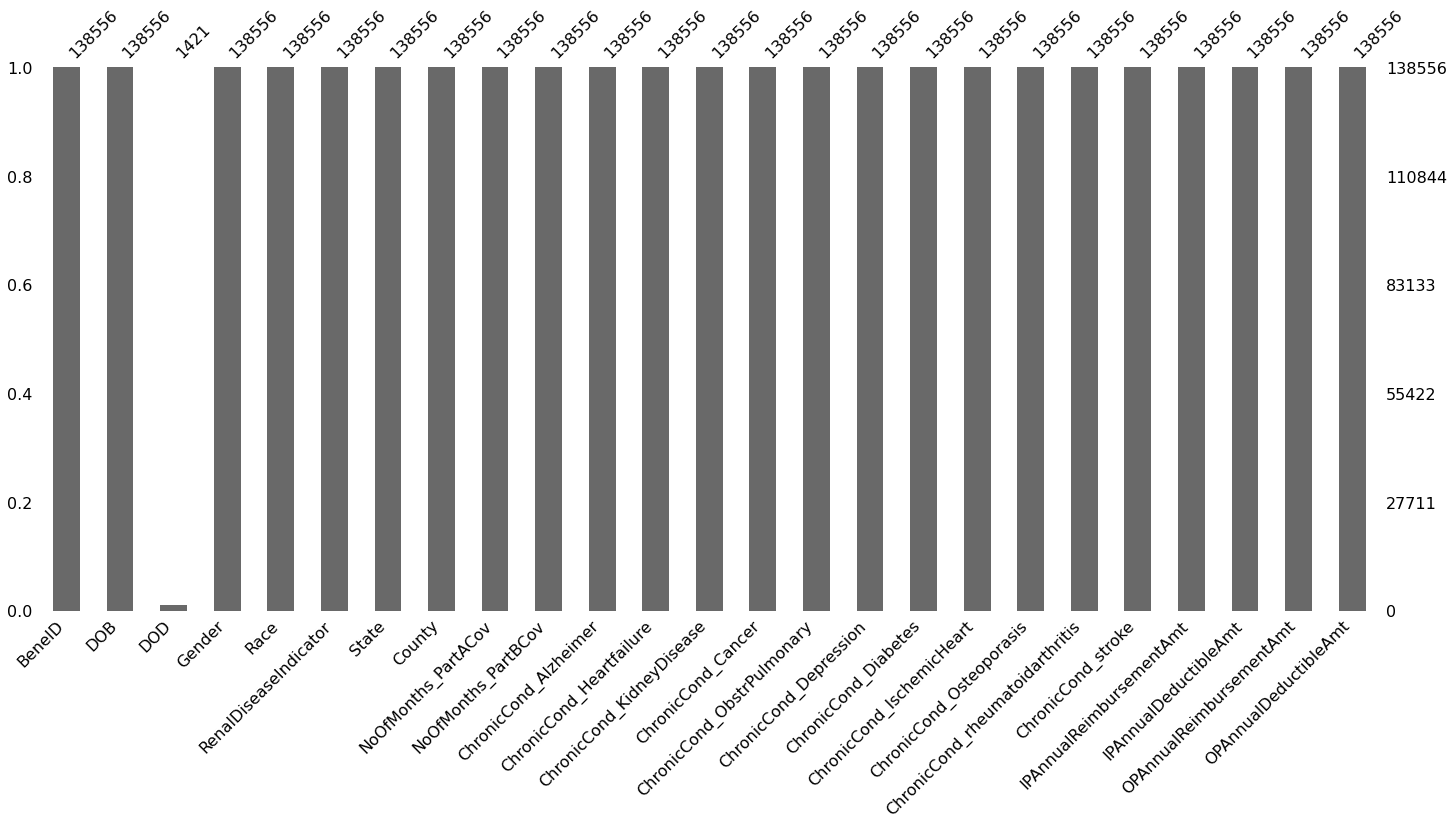

In [8]:
msno.bar(beneficiary_ds)

In [9]:
beneficiary_ds['DOB'] = beneficiary_ds.DOB.apply(lambda x:reg_expression.sub('-','',x))
beneficiary_ds['DOD'] = beneficiary_ds['DOD'].fillna('0')
beneficiary_ds['DOD'] = beneficiary_ds.DOD.apply(lambda x:reg_expression.sub('-','',x))

beneficiary_ds['DOB'] = beneficiary_ds['DOB'].astype('int64')
beneficiary_ds['DOD'] = beneficiary_ds['DOD'].astype('int64')

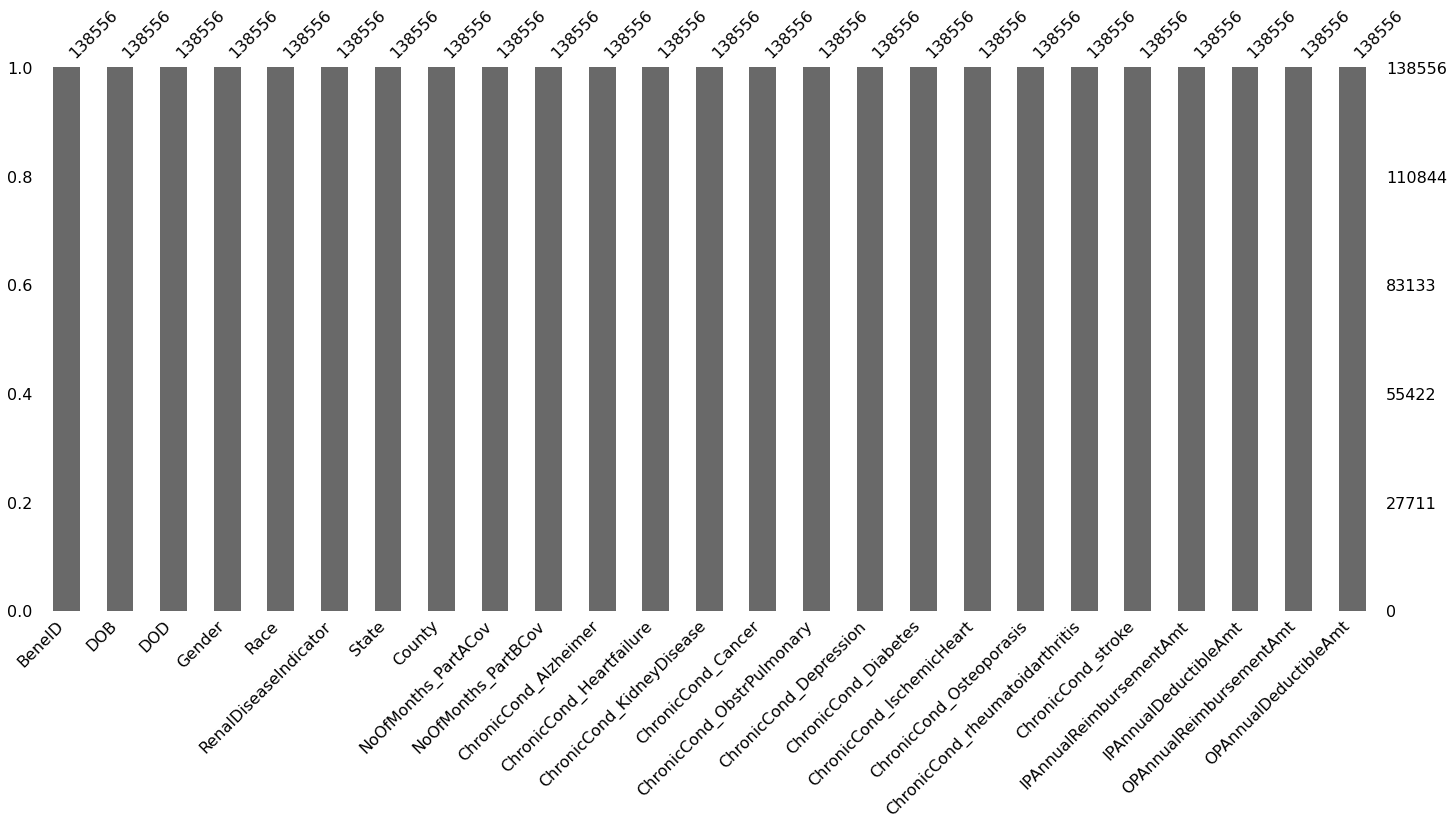

In [10]:
msno.bar(beneficiary_ds)

# Data type conversions

In [11]:
ben_categorical_ds = ['BeneID','Gender','Race','RenalDiseaseIndicator','State','County',
                      'NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer',
                      'ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer',
                      'ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes',
                      'ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis',
                      'ChronicCond_stroke'] 

beneficiary_ds[ben_categorical_ds]  = beneficiary_ds[ben_categorical_ds].astype('category')

inpatient_categorical_ds = ['Provider','AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
                            'ClmAdmitDiagnosisCode','DiagnosisGroupCode', 'ClmDiagnosisCode_1', 
                            'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 
                            'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                            'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                            'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 
                            'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6' ]

inpatient_ds[inpatient_categorical_ds]  = inpatient_ds[inpatient_categorical_ds].astype('category')

target_categorical_ds = ['Provider','PotentialFraud']

target_ds[target_categorical_ds]  = target_ds[target_categorical_ds].astype('category')

 

## Final dataset

In [12]:
df_final = beneficiary_ds.merge(inpatient_ds,on='BeneID').merge(target_ds,on='Provider')

In [13]:
df_final

BeneID       DOB  DOD Gender Race RenalDiseaseIndicator State  \
0       BENE11001  19430101    0      1    1                     0    39   
1       BENE17521  19131201    0      2    1                     0    39   
2       BENE21718  19221001    0      1    1                     0    39   
3       BENE22934  19300701    0      2    1                     0    39   
4       BENE24402  19250901    0      2    2                     0    39   
...           ...       ...  ...    ...  ...                   ...   ...   
40469  BENE156181  19520301    0      1    1                     Y    37   
40470  BENE156872  19430301    0      2    5                     Y     5   
40471  BENE157414  19391201    0      2    1                     Y    37   
40472  BENE158281  19571101    0      1    1                     Y    44   
40473  BENE159166  19510701    0      2    1                     0     5   

      County NoOfMonths_PartACov NoOfMonths_PartBCov  ... ClmDiagnosisCode_8  \
0        230                  12                  12  ...              19889   
1        230                  12                  12  ...               2753   
2        600                  12                  12  ...              43812   
3        280                  12                  12  ...               None   
4        510                  12                  12  ...               None   
...      ...                 ...                 ...  ...                ...   
40469    260                  12                  12  ...               1985   
40470    200                  12                  12  ...              41401   
40471    450                  12                  12  ...              V0481   
40472    430                  12                  12  ...               2866   
40473    480                  12                  12  ...              25000   

      ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0                   5849                None               None   
1                  E9305                None               7769   
2                   4019                None               9338   
3                   None                None               8154   
4                   None                None               8543   
...                  ...                 ...                ...   
40469               0414                None               9955   
40470               2639                None               3326   
40471               2761                None               None   
40472               None                None               9390   
40473              32723                2724               3324   

      ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4  \
0                   None               None               None   
1                   5849               None               None   
2                   None               None               None   
3                   None               None               None   
4                   None               None               None   
...                  ...                ...                ...   
40469               None               None               None   
40470               None               None               None   
40471               None               None               None   
40472               None               None               None   
40473               None               None               None   

      ClmProcedureCode_5 ClmProcedureCode_6 PotentialFraud  
0                   None               None            Yes  
1                   None               None            Yes  
2                   None               None            Yes  
3                   None               None            Yes  
4                   None               None            Yes  
...                  ...                ...            ...  
40469               None               None             No  
40470               None               None        

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   BeneID                           40474 non-null  object  
 1   DOB                              40474 non-null  int64   
 2   DOD                              40474 non-null  int64   
 3   Gender                           40474 non-null  category
 4   Race                             40474 non-null  category
 5   RenalDiseaseIndicator            40474 non-null  category
 6   State                            40474 non-null  category
 7   County                           40474 non-null  category
 8   NoOfMonths_PartACov              40474 non-null  category
 9   NoOfMonths_PartBCov              40474 non-null  category
 10  ChronicCond_Alzheimer            40474 non-null  category
 11  ChronicCond_Heartfailure         40474 non-null  category
 12  Chro

In [15]:
df_final.describe()

DOB           DOD  IPAnnualReimbursementAmt  \
count  4.047400e+04  4.047400e+04              40474.000000   
mean   1.935441e+07  1.578519e+05              17528.645056   
std    1.317277e+05  1.773850e+06              17562.156402   
min    1.909010e+07  0.000000e+00                  0.000000   
25%    1.926120e+07  0.000000e+00               6000.000000   
50%    1.934100e+07  0.000000e+00              12000.000000   
75%    1.941120e+07  0.000000e+00              22000.000000   
max    1.983120e+07  2.009120e+07             161470.000000   

       IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  \
count           40474.000000              40474.000000           40474.000000   
mean             1887.461234               1897.183130             529.319390   
std              1686.848629               3949.299161             948.130843   
min                 0.000000                -70.000000               0.000000   
25%              1068.000000                190.000000              40.000000   
50%              1068.000000                730.000000             210.000000   
75%              2136.000000               2020.000000             610.000000   
max             38272.000000             102960.000000           13840.000000   

       InscClaimAmtReimbursed  DeductibleAmtPaid  
count            40474.000000            39575.0  
mean             10087.884074             1068.0  
std              10303.099402                0.0  
min                  0.000000             1068.0  
25%               4000.000000             1068.0  
50%               7000.000000             1068.0  
75%              12000.000000             1068.0  
max             125000.000000             1068.0

In [16]:
df_final.head(20)

BeneID       DOB  DOD Gender Race RenalDiseaseIndicator State County  \
0   BENE11001  19430101    0      1    1                     0    39    230   
1   BENE17521  19131201    0      2    1                     0    39    230   
2   BENE21718  19221001    0      1    1                     0    39    600   
3   BENE22934  19300701    0      2    1                     0    39    280   
4   BENE24402  19250901    0      2    2                     0    39    510   
5   BENE28966  19340201    0      1    1                     0    39    440   
6   BENE29251  19591001    0      2    1                     Y    39    510   
7   BENE31905  19331201    0      2    2                     Y    39    540   
8   BENE31905  19331201    0      2    2                     Y    39    540   
9   BENE31905  19331201    0      2    2                     Y    39    540   
10  BENE31905  19331201    0      2    2                     Y    39    540   
11  BENE37685  19091001    0      1    1                     Y    39    510   
12  BENE37685  19091001    0      1    1                     Y    39    510   
13  BENE45976  19270401    0      1    1                     0    39    470   
14  BENE46443  19280401    0      2    1                     0    39    640   
15  BENE50078  19090301    0      2    1                     0    39    290   
16  BENE50535  19240301    0      1    1                     Y    39    580   
17  BENE53240  19410901    0      1    1                     Y    39    410   
18  BENE53240  19410901    0      1    1                     Y    39    410   
19  BENE53373  19380301    0      1    1                     0    39    710   

   NoOfMonths_PartACov NoOfMonths_PartBCov  ... ClmDiagnosisCode_8  \
0                   12                  12  ...              19889   
1                   12                  12  ...               2753   
2                   12                  12  ...              43812   
3                   12                  12  ...               None   
4                   12                  12  ...               None   
5                   12                  12  ...              53081   
6                   12                  12  ...              41401   
7                    0                  10  ...               7993   
8                    0                  10  ...               4148   
9                    0                  10  ...              60000   
10                   0                  10  ...              30000   
11                  12                  12  ...               None   
12                  12                  12  ...              25000   
13                  12                  12  ...               5990   
14                  12                  12  ...               None   
15                  12                  12  ...               5990   
16                  12                  12  ...              70722   
17                  12                  12  ...              V5331   
18                  12                  12  ...              78559   
19                  12                  12  ...                412   

   ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0                5849                None               None   
1               E9305                None               7769   
2                4019                None               9338   
3                None                None               8154   
4                None                None               8543   
5               42611               32723               3327   
6               82525                None               None   
7               40390                None               3995   
8                None                None               None   
9                4019                None               None   
10              V5869                None               8741   
11               None                None               4011   
12              42731                None   